In [55]:
import nltk

In [56]:
import re
text="Books—they have the power to transport readers to different worlds, eras, and emotions! Whether it’s a thrilling mystery... or a heartwarming tale, every story leaves its mark. Reading not only entertains, but also expands vocabulary, sparks imagination, and inspires thought. In today’s screen-dominated world, books offer something rare: a quiet, mindful escape. The joy of flipping pages, feeling the texture, and getting lost in a narrative—it's simply unmatched by any other medium."
text=re.sub(r"[^\w\s.]", " ", text.lower())
print(text)

books they have the power to transport readers to different worlds  eras  and emotions  whether it s a thrilling mystery... or a heartwarming tale  every story leaves its mark. reading not only entertains  but also expands vocabulary  sparks imagination  and inspires thought. in today s screen dominated world  books offer something rare  a quiet  mindful escape. the joy of flipping pages  feeling the texture  and getting lost in a narrative it s simply unmatched by any other medium.


In [57]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
word_tokens=word_tokenize(text)
print(word_tokens)

['books', 'they', 'have', 'the', 'power', 'to', 'transport', 'readers', 'to', 'different', 'worlds', 'eras', 'and', 'emotions', 'whether', 'it', 's', 'a', 'thrilling', 'mystery', '...', 'or', 'a', 'heartwarming', 'tale', 'every', 'story', 'leaves', 'its', 'mark', '.', 'reading', 'not', 'only', 'entertains', 'but', 'also', 'expands', 'vocabulary', 'sparks', 'imagination', 'and', 'inspires', 'thought', '.', 'in', 'today', 's', 'screen', 'dominated', 'world', 'books', 'offer', 'something', 'rare', 'a', 'quiet', 'mindful', 'escape', '.', 'the', 'joy', 'of', 'flipping', 'pages', 'feeling', 'the', 'texture', 'and', 'getting', 'lost', 'in', 'a', 'narrative', 'it', 's', 'simply', 'unmatched', 'by', 'any', 'other', 'medium', '.']


[nltk_data] Downloading package punkt to C:\Users\Shreyas
[nltk_data]     Mahajan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
from nltk.tokenize import sent_tokenize
sent_tokens=sent_tokenize(text)
print(sent_tokens)

['books they have the power to transport readers to different worlds  eras  and emotions  whether it s a thrilling mystery... or a heartwarming tale  every story leaves its mark.', 'reading not only entertains  but also expands vocabulary  sparks imagination  and inspires thought.', 'in today s screen dominated world  books offer something rare  a quiet  mindful escape.', 'the joy of flipping pages  feeling the texture  and getting lost in a narrative it s simply unmatched by any other medium.']


In [59]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

filtered_tokens=[word for word in word_tokens if word.lower() not in stop_words]
s= ' '.join(filtered_tokens)
print(s)

books power transport readers different worlds eras emotions whether thrilling mystery ... heartwarming tale every story leaves mark . reading entertains also expands vocabulary sparks imagination inspires thought . today screen dominated world books offer something rare quiet mindful escape . joy flipping pages feeling texture getting lost narrative simply unmatched medium .


[nltk_data] Downloading package stopwords to C:\Users\Shreyas
[nltk_data]     Mahajan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


.: 4
books: 2
power: 1
transport: 1
readers: 1
different: 1
worlds: 1
eras: 1
emotions: 1
whether: 1


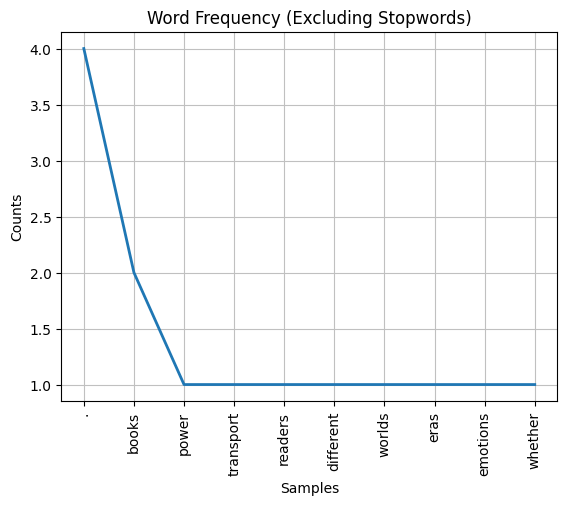

<Axes: title={'center': 'Word Frequency (Excluding Stopwords)'}, xlabel='Samples', ylabel='Counts'>

In [60]:
from nltk.probability import FreqDist
freq_dist=FreqDist(filtered_tokens)

for word, freq in freq_dist.most_common(10):
    print(f"{word}: {freq}")

freq_dist.plot(10, title="Word Frequency (Excluding Stopwords)")

Q2: Stemming and Lemmatization
1. Take the tokenized words from Question 1 (after stopword removal).
2. Apply stemming using NLTK's PorterStemmer and LancasterStemmer.
3. Apply lemmatization using NLTK's WordNetLemmatizer.
4. Compare and display results of both techniques.

In [61]:
from nltk.stem import PorterStemmer,LancasterStemmer
ps=PorterStemmer()
ls=LancasterStemmer()

porter_stems=[ps.stem(word) for word in filtered_tokens]
lancaster_stems=[ls.stem(word) for word in filtered_tokens]

In [62]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
lemmatized_words=[lemmatizer.lemmatize(word) for word in filtered_tokens]

[nltk_data] Downloading package wordnet to C:\Users\Shreyas
[nltk_data]     Mahajan\AppData\Roaming\nltk_data...


In [63]:
print(f"{'Original':<15}{'PorterStemmer':<20}{'LancasterStemmer':<20}{'Lemmatizer'}")
print("-" * 75)
for original, ps, ls, lm in zip(filtered_tokens, porter_stems, lancaster_stems, lemmatized_words):
    print(f"{original:<15}{ps:<20}{ls:<20}{lm}")

Original       PorterStemmer       LancasterStemmer    Lemmatizer
---------------------------------------------------------------------------
books          book                book                book
power          power               pow                 power
transport      transport           transport           transport
readers        reader              read                reader
different      differ              diff                different
worlds         world               world               world
eras           era                 era                 era
emotions       emot                emot                emotion
whether        whether             wheth               whether
thrilling      thrill              thrilling           thrilling
mystery        mysteri             mystery             mystery
...            ...                 ...                 ...
heartwarming   heartwarm           heartwarm           heartwarming
tale           tale                tal      

Q3. Regular Expressions and Text Splitting 
1. Take their original text from Ques on 1. 
2. Use regular expressions to:
   
   a. Extract all words with more than 5 letters.
   
   b. Extract all numbers (if any exist in their text).
   
   c. Extract all capitalized words. 
3. Use text splitting techniques to:
   
   a. Split the text into words containing only alphabets (removing digits and special characters).

   b. Extract words starting with a vowel.

In [64]:
text="Books—they have the power to transport readers to different worlds, eras, and emotions! Whether it’s a thrilling mystery... or a heartwarming tale, every story leaves its mark. Reading not only entertains, but also expands vocabulary, sparks imagination, and inspires thought. In today’s screen-dominated world, books offer something rare: a quiet, mindful escape. The joy of flipping pages, feeling the texture, and getting lost in a narrative—it's simply unmatched by any other medium."
print(text)

Books—they have the power to transport readers to different worlds, eras, and emotions! Whether it’s a thrilling mystery... or a heartwarming tale, every story leaves its mark. Reading not only entertains, but also expands vocabulary, sparks imagination, and inspires thought. In today’s screen-dominated world, books offer something rare: a quiet, mindful escape. The joy of flipping pages, feeling the texture, and getting lost in a narrative—it's simply unmatched by any other medium.


In [65]:
word_5=re.findall(r'\b[a-zA-Z]{6,}\b',text)
print(word_5)

['transport', 'readers', 'different', 'worlds', 'emotions', 'Whether', 'thrilling', 'mystery', 'heartwarming', 'leaves', 'Reading', 'entertains', 'expands', 'vocabulary', 'sparks', 'imagination', 'inspires', 'thought', 'screen', 'dominated', 'something', 'mindful', 'escape', 'flipping', 'feeling', 'texture', 'getting', 'narrative', 'simply', 'unmatched', 'medium']


In [66]:
all_numbers=re.findall(r'\b\d+\b',text)
print(all_numbers)

[]


In [67]:
capt_words=re.findall(r'\b[A-Z][a-z]*\b',text)
print(capt_words)

['Books', 'Whether', 'Reading', 'In', 'The']


In [68]:
alphabets=re.findall(r'\b[a-zA-Z]+\b',text)
print(alphabets)

['Books', 'they', 'have', 'the', 'power', 'to', 'transport', 'readers', 'to', 'different', 'worlds', 'eras', 'and', 'emotions', 'Whether', 'it', 's', 'a', 'thrilling', 'mystery', 'or', 'a', 'heartwarming', 'tale', 'every', 'story', 'leaves', 'its', 'mark', 'Reading', 'not', 'only', 'entertains', 'but', 'also', 'expands', 'vocabulary', 'sparks', 'imagination', 'and', 'inspires', 'thought', 'In', 'today', 's', 'screen', 'dominated', 'world', 'books', 'offer', 'something', 'rare', 'a', 'quiet', 'mindful', 'escape', 'The', 'joy', 'of', 'flipping', 'pages', 'feeling', 'the', 'texture', 'and', 'getting', 'lost', 'in', 'a', 'narrative', 'it', 's', 'simply', 'unmatched', 'by', 'any', 'other', 'medium']


In [69]:
vowel_words=[word for word in alphabets if re.match(r'^[aeiouAEIOU]',word)]
print(vowel_words)

['eras', 'and', 'emotions', 'it', 'a', 'or', 'a', 'every', 'its', 'only', 'entertains', 'also', 'expands', 'imagination', 'and', 'inspires', 'In', 'offer', 'a', 'escape', 'of', 'and', 'in', 'a', 'it', 'unmatched', 'any', 'other']


Q4. Custom Tokenization & Regex-based Text Cleaning 
1. Take original text from Ques on 1. 
2. Write a custom tokenization function that: 

    a. Removes punctuation and special symbols, but keeps contractions (e.g., "isn't" should not be split into "is" and "n't").

    b. Handles hyphenated words as a single token (e.g., "state-of-the-art" remains a single token). 

    c. Tokenizes numbers separately but keeps decimal numbers intact (e.g., "3.14" should remain as is). 

3. Use Regex Substitutions (re.sub) to:

    a. Replace email addresses with EMAIL placeholder.

    b. Replace URLs with URL placeholder. 

    c. Replace phone numbers (formats: 123-456-7890 or +91 9876543210) with PHONE placeholder.

In [70]:
text="Books---they have the power to transport readers to different worlds, eras, and emotions! Whether it’s a thrilling mystery... or a heartwarming tale, every story leaves its mark. Reading not only entertains, but also expands vocabulary, sparks imagination, and inspires thought. In today’s screen-dominated world, books offer something rare: a quiet, mindful escape. The joy of flipping pages, feeling the texture, and getting lost in a narrative—it's simply unmatched by any other medium."
print(text)

Books---they have the power to transport readers to different worlds, eras, and emotions! Whether it’s a thrilling mystery... or a heartwarming tale, every story leaves its mark. Reading not only entertains, but also expands vocabulary, sparks imagination, and inspires thought. In today’s screen-dominated world, books offer something rare: a quiet, mindful escape. The joy of flipping pages, feeling the texture, and getting lost in a narrative—it's simply unmatched by any other medium.


In [71]:
def custom_tokenize(text):
    text = re.sub(r"[–—]", "-", text)
    clean_text = re.sub(r"[^\w\s'-]", '', text)
    tokens = re.findall(r"\b(?:\d+\.\d+|\w+(?:[-']\w+)*)\b", clean_text)
    return tokens

In [72]:
tokens=custom_tokenize(text)
print(tokens)

['Books', 'they', 'have', 'the', 'power', 'to', 'transport', 'readers', 'to', 'different', 'worlds', 'eras', 'and', 'emotions', 'Whether', 'its', 'a', 'thrilling', 'mystery', 'or', 'a', 'heartwarming', 'tale', 'every', 'story', 'leaves', 'its', 'mark', 'Reading', 'not', 'only', 'entertains', 'but', 'also', 'expands', 'vocabulary', 'sparks', 'imagination', 'and', 'inspires', 'thought', 'In', 'todays', 'screen-dominated', 'world', 'books', 'offer', 'something', 'rare', 'a', 'quiet', 'mindful', 'escape', 'The', 'joy', 'of', 'flipping', 'pages', 'feeling', 'the', 'texture', 'and', 'getting', 'lost', 'in', 'a', "narrative-it's", 'simply', 'unmatched', 'by', 'any', 'other', 'medium']


In [73]:
def clean_text_with_placeholders(text):
    text=re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '<EMAIL>', text)
    text=re.sub(r'\b(?:https?://|www\.)\S+\b', '<URL>', text)
    text=re.sub(r'(?:\+91[\s-]?\d{10}|\d{3}[-\s]?\d{3}[-\s]?\d{4})', '<PHONE>', text)
    return text

In [74]:
text="Contact me at john.doe@example.com or visit https://example.com. You can also call +91 9876543210 or 123-456-7890. Another email: test_user123@mail.co.uk"
print(text)

Contact me at john.doe@example.com or visit https://example.com. You can also call +91 9876543210 or 123-456-7890. Another email: test_user123@mail.co.uk


In [75]:
print(clean_text_with_placeholders(text))

Contact me at <EMAIL> or visit <URL>. You can also call <PHONE> or <PHONE>. Another email: <EMAIL>
